# 💡Courier charge variation

## Table of Content

### 🎧Data understanding
- Importing various libraries
- Read the data
- Analyze the shape
- Analyze the data type

### ✂Data Cleaning and Manipulation
- Check for null value and duplicate value
- Check for null percentage if required
- Deal with null and duplicate values.
  - Either drop the columns or impute the missing value as required.
  
### 🖇Merge Data frame (Inner Join) , print Report before Outlier treatment 
- Once the data frame is merged the final report is printed as per the O/P before outlier treatment as treatment will lead to some change or data loss which we need to preserve , but once the csv is saved in the required format we will do outlier check.

### 🛒Structuring
- Check for number of unique value in each column
- Clubbing the columns in similar bucket depending on its nature
  - Categorical
  - Continuous 
  
### 🔧Data analysis and treating the outlier if any
- Performed univariate and Bivariate analysis on variables.

### 📝Summary after Outlier treatment

### Data understanding

In [1]:
# For mathematical calculation and dataframe
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Ceiling ()
import math

# For ignoring the warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Company X data set
X_Order_Report = pd.read_excel("Company X - Order Report.xlsx")
X_Pincode_Zone = pd.read_excel("Company X - Pincode Zones.xlsx")
X_SKU_Master = pd.read_excel("Company X - SKU Master.xlsx")

# Courier Company data set
Courier_Company_Invoice = pd.read_excel("Courier Company - Invoice.xlsx")
Courier_Company_Rates = pd.read_excel("Courier Company - Rates.xlsx")

Expected_Result = pd.read_excel("Expected_Result.xlsx")

# Changing the theme just for asthectic purpose.
plt.style.use("fivethirtyeight")

## Understanding and cleaning the data

#### Company X - Order Report

In [3]:
X_Order_Report.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [4]:
X_Order_Report.shape

(400, 3)

In [5]:
X_Order_Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


There are no null values in the data set

Let's check why SKU column is of object type

In [6]:
X_Order_Report.SKU.unique()

array([8904223818706, 8904223819093, 8904223819109, 8904223818430,
       8904223819277, 'GIFTBOX202002', 8904223818638, 'SACHETS001',
       8904223819024, 8904223819291, 8904223818669, 8904223819031,
       8904223819468, 8904223819130, 8904223818591, 8904223818850,
       8904223818980, 8904223818614, 8904223819321, 8904223819338,
       8904223818942, 8904223818683, 8904223819239, 8904223819246,
       8904223819253, 8904223819147, 8904223815859, 8904223817501,
       8904223817273, 8904223818935, 8904223818478, 8904223819284,
       8904223816214, 8904223818874, 8904223819512, 8904223818881,
       8904223818553, 8904223816665, 'GIFTBOX202003', 8904223819017,
       8904223819499, 8904223818751, 8904223815873, 8904223819352,
       8904223819543, 8904223819505, 8904223819345, 8904223818454,
       8904223818898, 'GIFTBOX202004', 8904223819116, 8904223815866,
       8904223815682, 8904223817334, 'GIFTBOX202001', 8904223819369,
       8904223819161, 8904223819260, 8904223818713, 890

Ok so it has mixture of string and numeric values so it's fine to have object data type

#### Company X - Pincode Zones

In [7]:
X_Pincode_Zone.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [8]:
X_Pincode_Zone.shape

(124, 3)

In [9]:
X_Pincode_Zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  124 non-null    int64 
 1   Customer Pincode   124 non-null    int64 
 2   Zone               124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


Let's check for the duplicay in Pincode column

In [10]:
X_Pincode_Zone.drop_duplicates(subset = "Customer Pincode",keep = "first" ,inplace = True )

In [11]:
X_Pincode_Zone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 121
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  108 non-null    int64 
 1   Customer Pincode   108 non-null    int64 
 2   Zone               108 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


No null value found

#### Company X - SKU Master

In [12]:
X_SKU_Master.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [13]:
X_SKU_Master.shape

(66, 2)

Check for duplicate values in SKU column as this should be unique

In [14]:
X_SKU_Master.SKU.value_counts()

GIFTBOX202002    2
8904223815682    1
8904223819291    1
8904223819116    1
8904223819161    1
                ..
8904223818997    1
8904223818942    1
8904223819024    1
8904223819031    1
SACHETS001       1
Name: SKU, Length: 65, dtype: int64

Yes we have duplicate value so we will just remove all the duplicates from this dataframe.

In [15]:
X_SKU_Master.drop_duplicates(subset="SKU", keep='first', inplace=True)

In [16]:
X_SKU_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         65 non-null     object
 1   Weight (g)  65 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [17]:
# Sanity Check
X_SKU_Master.SKU.value_counts()

8904223815682    1
8904223819093    1
8904223819116    1
8904223819161    1
8904223819147    1
                ..
8904223818997    1
8904223818942    1
8904223819024    1
8904223819031    1
SACHETS001       1
Name: SKU, Length: 65, dtype: int64

No null value found

#### Courier Company - Invoice

In [18]:
Courier_Company_Invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [19]:
Courier_Company_Invoice.shape

(124, 8)

In [20]:
# Removing the duplicate "Order ID" if any

Courier_Company_Invoice.drop_duplicates(subset="Order ID", keep='first', inplace=True)

In [21]:
Courier_Company_Invoice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 8.7+ KB


No null value found

#### Courier Company - Rates

In [22]:
Courier_Company_Rates.head()

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [23]:
Courier_Company_Rates.shape

(1, 20)

In [24]:
Courier_Company_Rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fwd_a_fixed       1 non-null      float64
 1   fwd_a_additional  1 non-null      float64
 2   fwd_b_fixed       1 non-null      int64  
 3   fwd_b_additional  1 non-null      float64
 4   fwd_c_fixed       1 non-null      float64
 5   fwd_c_additional  1 non-null      float64
 6   fwd_d_fixed       1 non-null      float64
 7   fwd_d_additional  1 non-null      float64
 8   fwd_e_fixed       1 non-null      float64
 9   fwd_e_additional  1 non-null      float64
 10  rto_a_fixed       1 non-null      float64
 11  rto_a_additional  1 non-null      float64
 12  rto_b_fixed       1 non-null      float64
 13  rto_b_additional  1 non-null      float64
 14  rto_c_fixed       1 non-null      float64
 15  rto_c_additional  1 non-null      float64
 16  rto_d_fixed       1 non-null      float64
 17  r

#### Conclusion
- Data are well cleaned to move with Analysis

### Merging


First we will move with Company X data set

Let's merge the order report and SKU Master data set to get valuable info

In [25]:
Company_X  = pd.merge(X_Order_Report , X_SKU_Master , how = "inner" , on = "SKU" )
Company_X.tail()

,ExternOrderNo,SKU,Order Qty,Weight (g)
395,2001806616,8904223819123,1.0,250
396,2001806567,8904223815804,1.0,160
397,2001806567,8904223818577,1.0,150
398,2001806408,8904223819437,2.0,552
399,2001806232,8904223818645,6.0,137


Let's update the Weight column after multiplying it with Order Qty
- Total Weight = Order Qty * Weight(g)/1000

In [26]:
Company_X["Total weight as per X (KG)"] = (Company_X["Weight (g)"] * Company_X["Order Qty"])/1000
Company_X.tail()

,ExternOrderNo,SKU,Order Qty,Weight (g),Total weight as per X (KG)
395,2001806616,8904223819123,1.0,250,0.250
396,2001806567,8904223815804,1.0,160,0.160
397,2001806567,8904223818577,1.0,150,0.150
398,2001806408,8904223819437,2.0,552,1.104
399,2001806232,8904223818645,6.0,137,0.822


In [27]:
# Dropping the Weight(g) column as it is of no use now

Company_X.drop(columns="Weight (g)",inplace = True)

#### Creating a pivot table to club the same ExternOrderNo order so to get the total weight

In [28]:
pivot_Company_X = pd.pivot_table(data = Company_X,index="ExternOrderNo",values= ["Order Qty","Total weight as per X (KG)"],aggfunc = np.sum)

In [29]:
pivot_Company_X["Weight slab as per X (KG)"] = pivot_Company_X["Total weight as per X (KG)"].apply(lambda x : math.ceil(x/0.5)*0.5)

In [30]:
pivot_Company_X.reset_index(inplace =True)

In [31]:
pd.set_option("display.max_rows",125)

Let's add Customer Pincode to the Company_X data set from the Courier data set

In [32]:
pivot_Company_X =  pd.merge( Courier_Company_Invoice ,pivot_Company_X, how = "inner" ,
                      right_on = "ExternOrderNo" , left_on = "Order ID")

In [33]:
pivot_Company_X.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,Order Qty,Total weight as per X (KG),Weight slab as per X (KG)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,2001806232,8.0,1.302,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,2001806273,4.0,0.615,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2001806408,12.0,2.265,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,2001806458,2.0,0.700,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,2001807012,1.0,0.240,0.5


We will drop certain columns which are of no use in our analysis or are redundant

In [34]:
# Dropping ExternOrderNo as we have already OrderID and also we have used inner merge so there will not be
# any difference

pivot_Company_X.drop(columns = ["ExternOrderNo","Warehouse Pincode"] , axis = 1 , inplace = True)

In [35]:
# Renaming columns are per our final O/P

pivot_Company_X.rename(columns = {"AWB Code":"AWB Number",
                            "Zone" : "Delivery Zone charged by Courier Company" ,
                            "Charged Weight" : "Total weight as per Courier Company (KG)",
                           "Billing Amount (Rs.)":"Charges Billed by Courier Company (Rs.)"},
                 inplace = True)

In [36]:
# Calculating Weight slab on the basis of  Total weight as per Courier Company (KG)

pivot_Company_X["Weight slab charged by Courier Company (KG)"] =pivot_Company_X["Total weight as per Courier Company (KG)"].apply(lambda x : math.ceil(x/0.5)*0.5)

In [37]:
pivot_Company_X.head()

,AWB Number,Order ID,Total weight as per Courier Company (KG),Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Order Qty,Total weight as per X (KG),Weight slab as per X (KG),Weight slab charged by Courier Company (KG)
0,1091117222124,2001806232,1.30,507101,d,Forward charges,135.0,8.0,1.302,1.5,1.5
1,1091117222194,2001806273,1.00,486886,d,Forward charges,90.2,4.0,0.615,1.0,1.0
2,1091117222931,2001806408,2.50,532484,d,Forward charges,224.6,12.0,2.265,2.5,2.5
3,1091117223244,2001806458,1.00,143001,b,Forward charges,61.3,2.0,0.700,1.0,1.0
4,1091117229345,2001807012,0.15,515591,d,Forward charges,45.4,1.0,0.240,0.5,0.5


Let's map Zone to the Company_X as per the Customer Pincode 

In [38]:
pivot_Company_X = pd.merge(pivot_Company_X,X_Pincode_Zone , how = "inner" ,on = "Customer Pincode")
pivot_Company_X.rename(columns = {"Zone":"Delivery Zone as per X"},inplace = True)
pivot_Company_X.drop(columns = ["Warehouse Pincode"] , axis = 1 , inplace = True)
pivot_Company_X.head()

,AWB Number,Order ID,Total weight as per Courier Company (KG),Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Order Qty,Total weight as per X (KG),Weight slab as per X (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X
0,1091117222124,2001806232,1.30,507101,d,Forward charges,135.0,8.0,1.302,1.5,1.5,d
1,1091117222194,2001806273,1.00,486886,d,Forward charges,90.2,4.0,0.615,1.0,1.0,d
2,1091117222931,2001806408,2.50,532484,d,Forward charges,224.6,12.0,2.265,2.5,2.5,d
3,1091117223244,2001806458,1.00,143001,b,Forward charges,61.3,2.0,0.700,1.0,1.0,b
4,1091117229345,2001807012,0.15,515591,d,Forward charges,45.4,1.0,0.240,0.5,0.5,d


In [39]:
# Function to calculate the charges of the product based on Zone and the weight

def expected_charge(x):
    
    if x["Type of Shipment"] == "Forward charges":
        if x["Delivery Zone as per X"] == "a":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 29.5
            else:
                charge = 29.5 + (23.6 * (x["Weight slab as per X (KG)"]-0.5))
                    
        elif x["Delivery Zone as per X"] == "b":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 33
            else:
                charge = 33 + (28.3 * (x["Weight slab as per X (KG)"]-0.5))
            
        elif x["Delivery Zone as per X"] == "c":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 40.1
            else:
                charge = 40.1 + (38.9 *(x["Weight slab as per X (KG)"]-0.5))
                    
        elif x["Delivery Zone as per X"] == "d":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 45.4
            else:
                charge = 45.4+ (44.8 * (x["Weight slab as per X (KG)"]-0.5))
                    
        elif x["Delivery Zone as per X"] == "e":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 56.6
            else:
                charge = 56.6 + (55.5 * (x["Weight slab as per X (KG)"]-0.5))
    else:
        if x["Delivery Zone as per X"] == "a":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 29.5 +13.6
            else:
                charge = 29.5 + 13.6 + ((23.6 + 23.6)* (x["Weight slab as per X (KG)"]-0.5))
                
        elif x["Delivery Zone as per X"] == "b":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 33 +20.5
            else:
                charge = 33 + 20.5+ ((28.3 * 2) * (x["Weight slab as per X (KG)"] -0.5))
                
        elif x["Delivery Zone as per X"] == "c":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 40.1 +31.9
            else:
                charge = 40.1 + 31.9 + ((38.9*2) * (x["Weight slab as per X (KG)"]-0.5))
                
        elif x["Delivery Zone as per X"] == "d":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 45.4 + 41.3
            else:
                charge = 45.4 + 41.3 + ((44.8 *2) * (x["Weight slab as per X (KG)"]-0.5)) 
                
        elif x["Delivery Zone as per X"] == "e":
            if x["Weight slab as per X (KG)"] == 0.5:
                charge = 56.6 + 50.7
            else:
                charge = 56.6 + 50.7 + ((55.5 * 2) * (x["Weight slab as per X (KG)"]-0.5))
    return charge

In [40]:
pivot_Company_X["Expected Charge as per X (Rs.)"] = pivot_Company_X.apply(expected_charge,axis = 1)

In [41]:
pivot_Company_X["Difference Between Expected Charges and Billed Charges (Rs.)"] = pivot_Company_X["Expected Charge as per X (Rs.)"] - pivot_Company_X["Charges Billed by Courier Company (Rs.)"]

Let's rearrange the columns for our ease

In [42]:
pivot_Company_X = pivot_Company_X[["Order ID","AWB Number","Order Qty","Type of Shipment",
                        "Total weight as per X (KG)","Weight slab as per X (KG)",
                       "Total weight as per Courier Company (KG)",
                       "Weight slab charged by Courier Company (KG)","Delivery Zone as per X",
                       "Delivery Zone charged by Courier Company","Expected Charge as per X (Rs.)",
                       "Charges Billed by Courier Company (Rs.)",
                       "Difference Between Expected Charges and Billed Charges (Rs.)"]]
pivot_Company_X.head()

,Order ID,AWB Number,Order Qty,Type of Shipment,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,8.0,Forward charges,1.302,1.5,1.30,1.5,d,d,90.20,135.0,-44.80
1,2001806273,1091117222194,4.0,Forward charges,0.615,1.0,1.00,1.0,d,d,67.80,90.2,-22.40
2,2001806408,1091117222931,12.0,Forward charges,2.265,2.5,2.50,2.5,d,d,135.00,224.6,-89.60
3,2001806458,1091117223244,2.0,Forward charges,0.700,1.0,1.00,1.0,b,b,47.15,61.3,-14.15
4,2001807012,1091117229345,1.0,Forward charges,0.240,0.5,0.15,0.5,d,d,45.40,45.4,0.00


- Now we have all the columns which are needed in our final report
- Before analysising the data we will just figure out the summary report

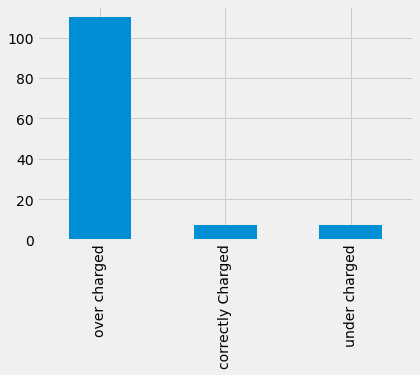

In [43]:
charge = pivot_Company_X["Difference Between Expected Charges and Billed Charges (Rs.)"].to_frame()
# Creating a column with the tag of charge type

def bucket_charge(x):
    if x["Difference Between Expected Charges and Billed Charges (Rs.)"]== 0:
        return "correctly Charged"
    elif x["Difference Between Expected Charges and Billed Charges (Rs.)"]< 0:
        return "over charged"
    else:
        return "under charged"
    
charge["charge_bucket"] = charge.apply(bucket_charge , axis = 1)
charge.charge_bucket.value_counts().plot.bar()
plt.show()

#### Conclusion
- Something fishy going!!

In [44]:
charge.rename(columns= {"Difference Between Expected Charges and Billed Charges (Rs.)": "Amount"},inplace = True)

### Summary 

In [45]:
summary1=charge.groupby("charge_bucket").agg({"Amount" : ["count","sum"]})
# Renaming the index and column
summary1.rename(columns = {"count":"Count","sum":"Amount(Rs.)"},
                index={"correctly Charged":"Total orders where X has been correctly charged",
                      "over charged":"Total Orders where X has been overcharged",
                      "under charged":"Total Orders where X has been undercharged"},inplace = True)

#### Saving the data set as a CSV file before performing EDA 

In [46]:
# deep copying the data set to other variable
summary2=pivot_Company_X.copy(deep = True) 

# Dropping the columns from the copied data set to meet the reqiurment of the final report
summary2.drop(columns = ["Order Qty","Type of Shipment"] , axis = 1 , inplace = True)

# Saving the report in the csv file
summary2.to_csv("Final_table2.csv",index=False)
summary1.to_csv("Final_table1.csv",index=True)

In [47]:
pd.read_csv("Final_table1.csv")

,Unnamed: 0,Amount,Amount.1
0,NaN,Count,Amount(Rs.)
1,charge_bucket,NaN,NaN
2,Total orders where X has been correctly charged,7,0.0
3,Total Orders where X has been overcharged,110,-6241.95
4,Total Orders where X has been undercharged,7,123.44999999999999


In [48]:
pd.read_csv("Final_table2.csv")

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,1.302,1.5,1.30,1.5,d,d,90.20,135.0,-4.480000e+01
1,2001806273,1091117222194,0.615,1.0,1.00,1.0,d,d,67.80,90.2,-2.240000e+01
2,2001806408,1091117222931,2.265,2.5,2.50,2.5,d,d,135.00,224.6,-8.960000e+01
3,2001806458,1091117223244,0.700,1.0,1.00,1.0,b,b,47.15,61.3,-1.415000e+01
4,2001807012,1091117229345,0.240,0.5,0.15,0.5,d,d,45.40,45.4,0.000000e+00
5,2001806686,1091117229555,0.240,0.5,0.15,0.5,d,d,45.40,45.4,0.000000e+00
6,2001806885,1091117229776,0.840,1.0,1.00,1.0,b,b,47.15,61.3,-1.415000e+01
7,2001807058,1091117323112,1.168,1.5,1.15,1.5,b,b,61.30,89.6,-2.830000e+01
8,2001808118,1091117435134,0.343,0.5,0.50,0.5,b,b,33.00,33.0,0.000000e+00
9,2001807186,1091117323812,0.500,0.5,0.50,0.5,d,d,45.40,45.4,0.000000e+00


# Structuring

In [49]:
for i in pivot_Company_X.columns:
    print(i, " ",pivot_Company_X[i].nunique()," ",pivot_Company_X[i].dtype)

Order ID   124   int64
AWB Number   124   int64
Order Qty   15   float64
Type of Shipment   2   object
Total weight as per X (KG)   68   float64
Weight slab as per X (KG)   7   float64
Total weight as per Courier Company (KG)   54   float64
Weight slab charged by Courier Company (KG)   7   float64
Delivery Zone as per X   3   object
Delivery Zone charged by Courier Company   3   object
Expected Charge as per X (Rs.)   23   float64
Charges Billed by Courier Company (Rs.)   20   float64
Difference Between Expected Charges and Billed Charges (Rs.)   42   float64


In [50]:
categorical = ["Order Qty","Type of Shipment","Weight slab as per X (KG)",
              "Weight slab charged by Courier Company (KG)","Delivery Zone as per X",
              "Delivery Zone charged by Courier Company"]

continuous = ["Total weight as per X (KG)","Total weight as per Courier Company (KG)",
             "Expected Charge as per X (Rs.)","Charges Billed by Courier Company (Rs.)",
              "Difference Between Expected Charges and Billed Charges (Rs.)"]

In [51]:
# Sanity Check

print(pivot_Company_X.shape)
len(categorical)+len(continuous)+2

(124, 13)


13

## Univariate Analysis
### - Continuous Variable

Total weight as per X (KG)


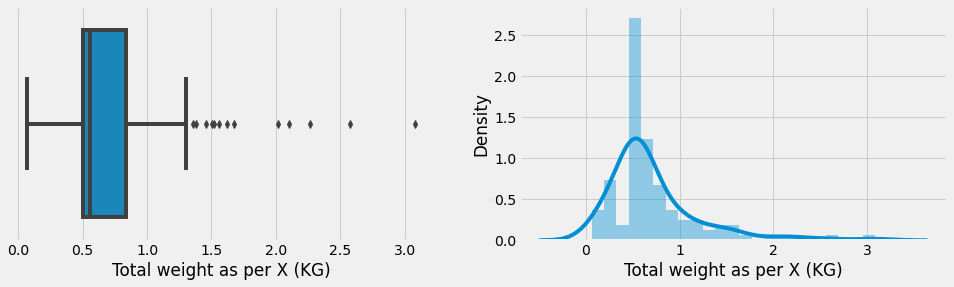

Total weight as per Courier Company (KG)


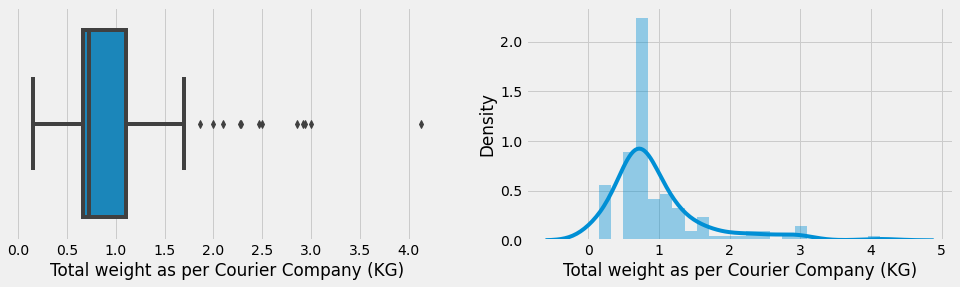

Expected Charge as per X (Rs.)


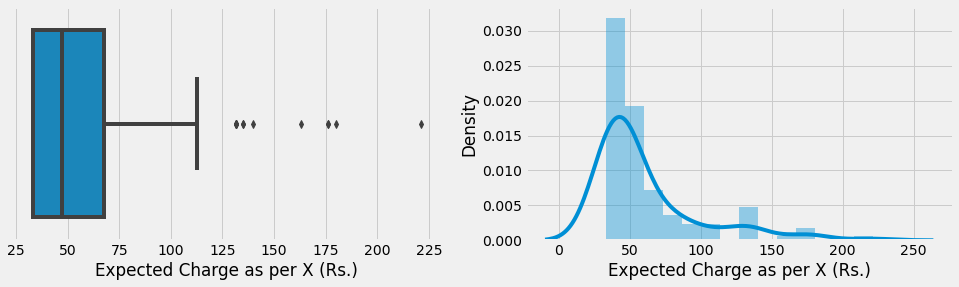

Charges Billed by Courier Company (Rs.)


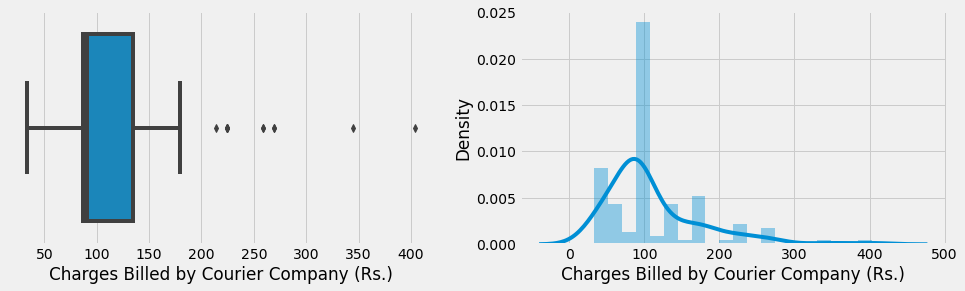

Difference Between Expected Charges and Billed Charges (Rs.)


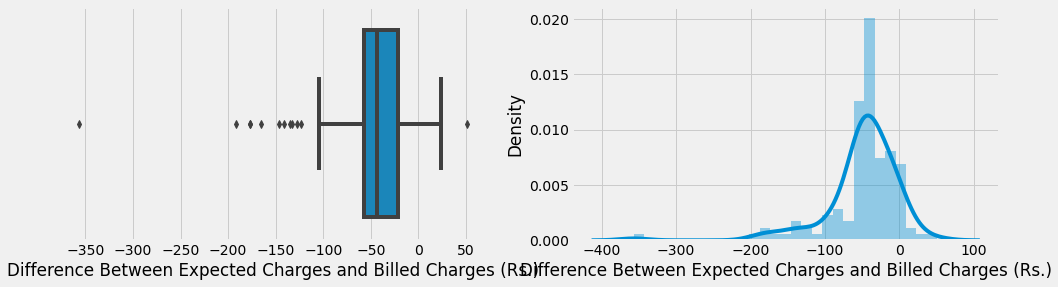

In [52]:
for i in continuous:
    print(i)
    plt.figure(figsize=[15,4]) #Increasing the size of the plots
    
    plt.subplot(121) # First plot code
    sns.boxplot(pivot_Company_X[i])
    
    plt.subplot(122) # Second plot code
    sns.distplot(pivot_Company_X[i])
    
    plt.show()

Outlier is found so let's treat it before going further

In [53]:
# Capping and flooring the outliers so that justice can be done to the analysis.
for i in continuous:
    
    q1=np.percentile(pivot_Company_X[i],25) # Finding the 25th percentile
    q3=np.percentile(pivot_Company_X[i],75) # Finding the 75th percentile
    
    iqr=q3-q1 # Finding Inter Quatile Range
    
    uw=q3+1.5*iqr # Finding the upper whisker limit
    lw=q1-1.5*iqr # Finding the lower whisker limit
    
    # replacing the lower boundary outliers with the lower whisker value
    pivot_Company_X[i]=np.where(pivot_Company_X[i]<lw,lw,pivot_Company_X[i]) 
    # replacing the upper boundary outliers with the upper whisker value
    pivot_Company_X[i]=np.where(pivot_Company_X[i]>uw,uw,pivot_Company_X[i]) 

Total weight as per X (KG)


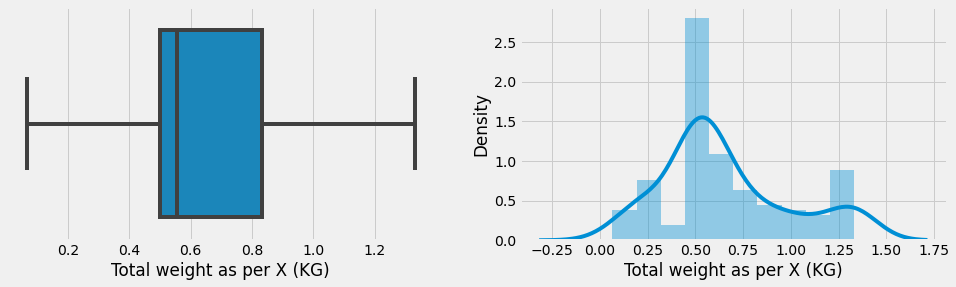

Total weight as per Courier Company (KG)


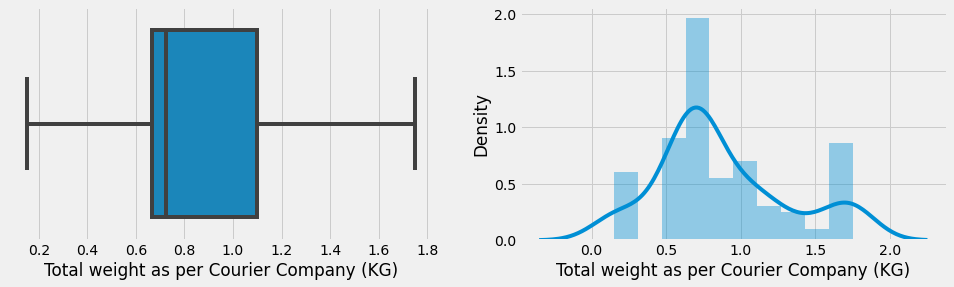

Expected Charge as per X (Rs.)


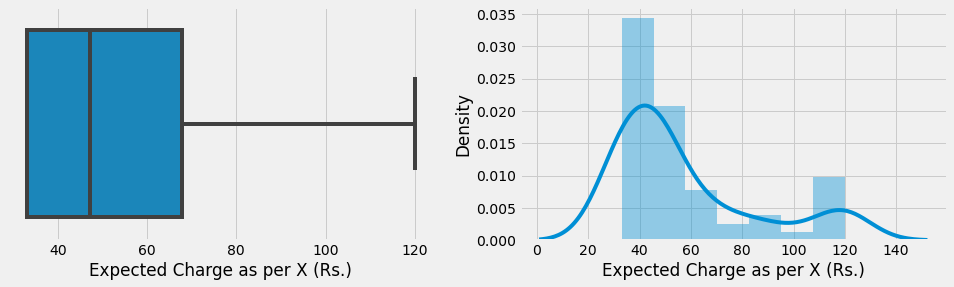

Charges Billed by Courier Company (Rs.)


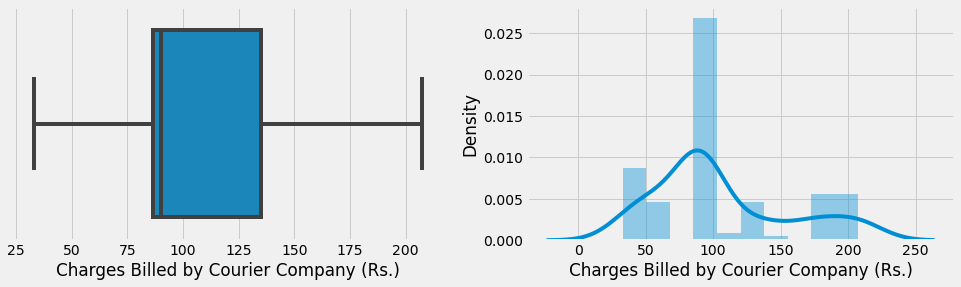

Difference Between Expected Charges and Billed Charges (Rs.)


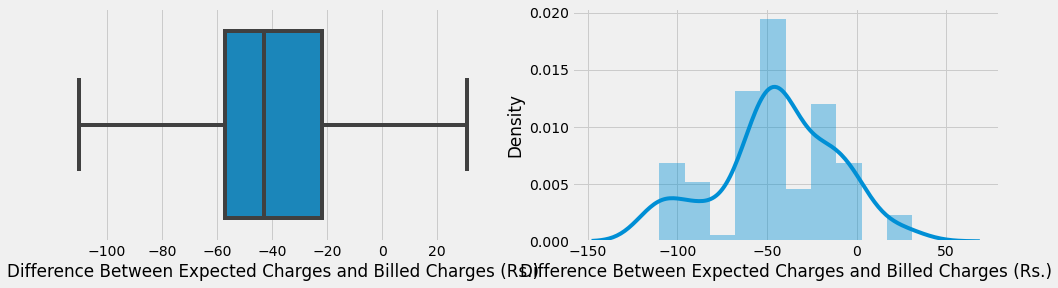

In [54]:
# SAnity Check
for i in continuous:
    print(i)
    plt.figure(figsize=[15,4]) #Increasing the size of the plots
    
    plt.subplot(121) # First plot code
    sns.boxplot(pivot_Company_X[i])
    
    plt.subplot(122) # Second plot code
    sns.distplot(pivot_Company_X[i])
    
    plt.show()

#### Conclusion
- Total weight as per X (KG) have median < 0.6 kg while Total weight as per Courier Company (KG) has median is around 0.7 kg.
- The median Expected Charge as per X (Rs.) is around Rs 50 whereas Charges Billed by Courier Company (Rs.) has median of Rs. 90

###  Categorical Variable

Order Qty


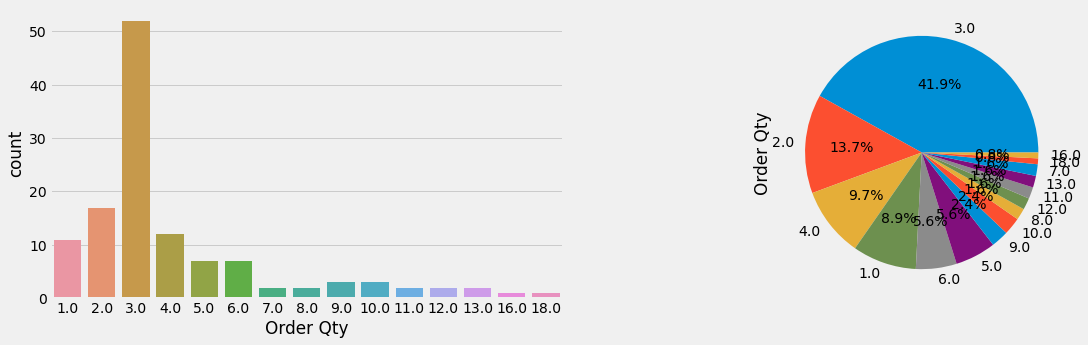

Type of Shipment


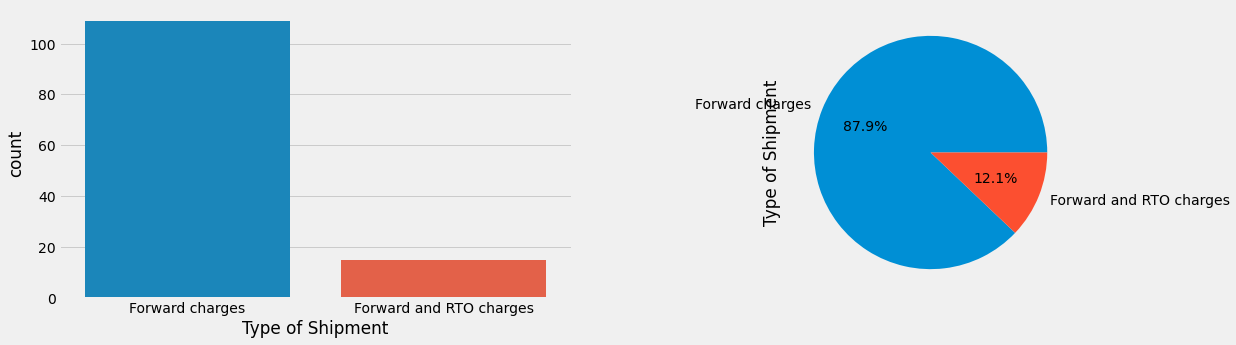

Weight slab as per X (KG)


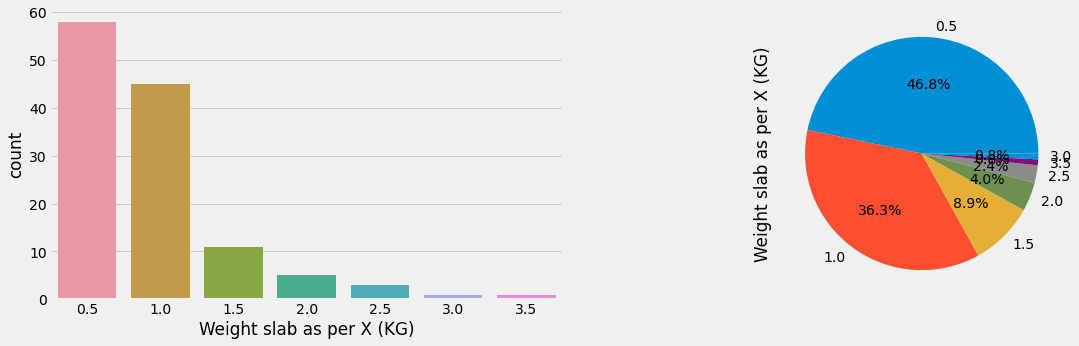

Weight slab charged by Courier Company (KG)


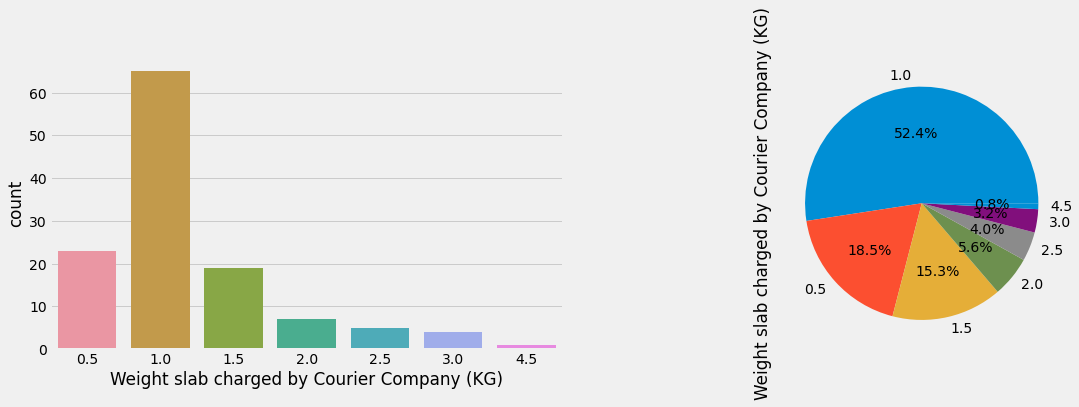

Delivery Zone as per X


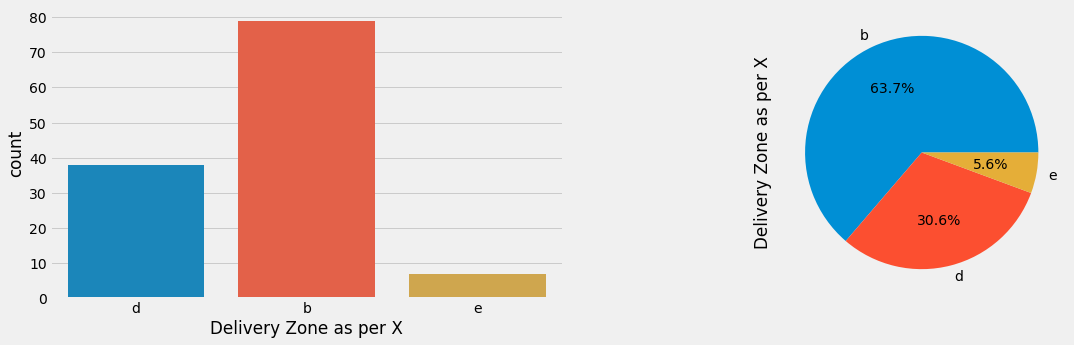

Delivery Zone charged by Courier Company


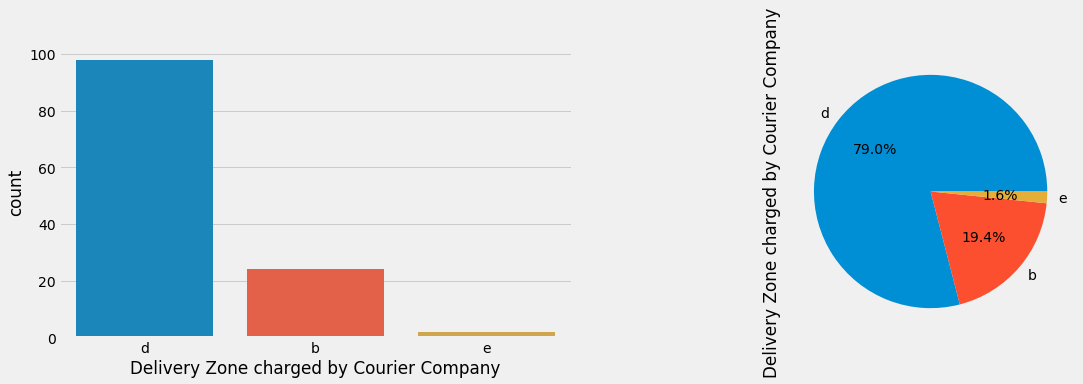

In [55]:
for i in categorical:# Automating all the categorical variables countplot
    print(i)
    
    plt.figure(figsize=[18,5])
    plt.subplot(121)
    sns.countplot(pivot_Company_X[i])
   
    plt.subplot(122)
    pivot_Company_X[i].value_counts().plot.pie(autopct="%0.01f%%")

    plt.show()

#### Conclusion
- Most of the orders are for 3 Quantity.
- Around 90% shipping type are of "Forward Charges".
- Most of the Weight slab as per X (KG) lies in 0.5 kg bucket.
- Most of the Weight slab charged by Courier Company (KG) lies in 1 kg bucket.
- Most of the Delivery Zone as per X are from Zone "b".
- Most of the Delivery Zone charged by Courier Company are from Zone "d".

## Bivariate Analysis

### Categorical VS Continuous Variable

Order Qty Vs Total weight as per X (KG)


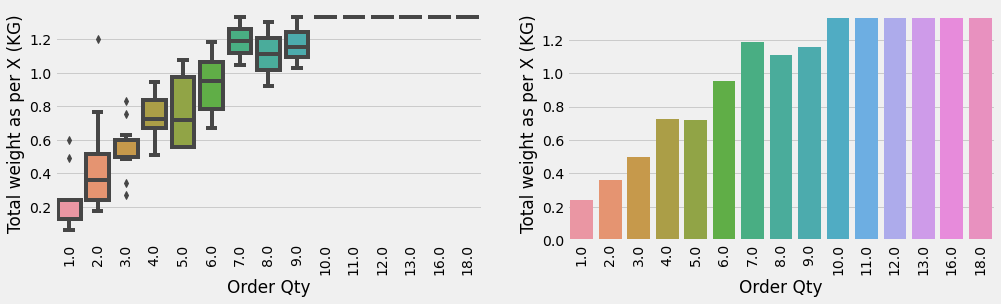

Order Qty Vs Total weight as per Courier Company (KG)


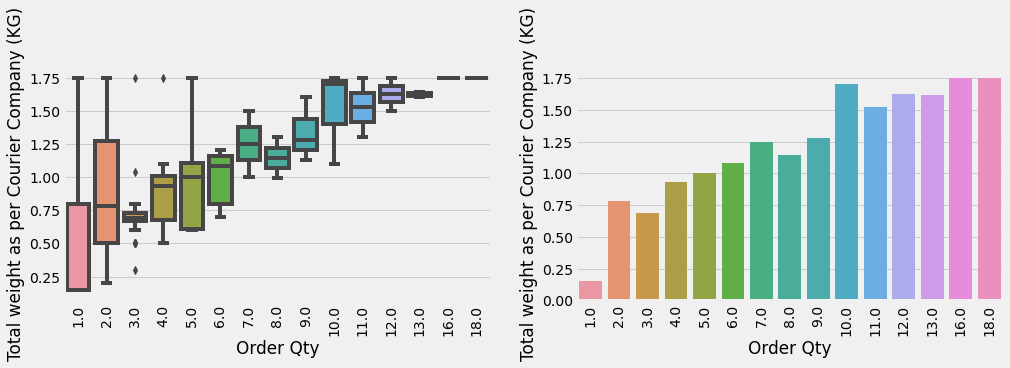

Order Qty Vs Expected Charge as per X (Rs.)


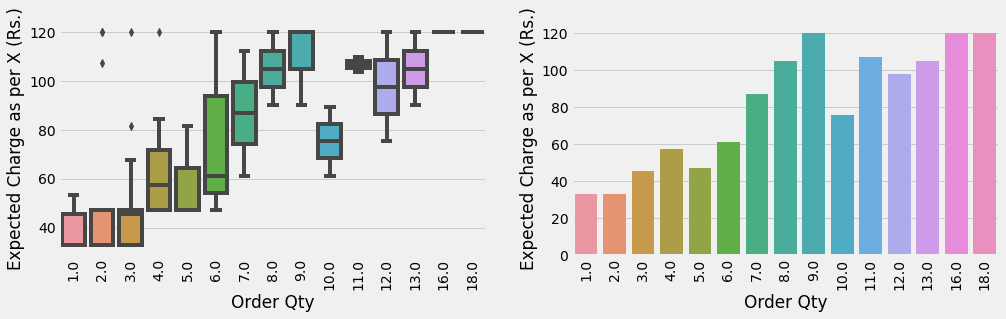

Order Qty Vs Charges Billed by Courier Company (Rs.)


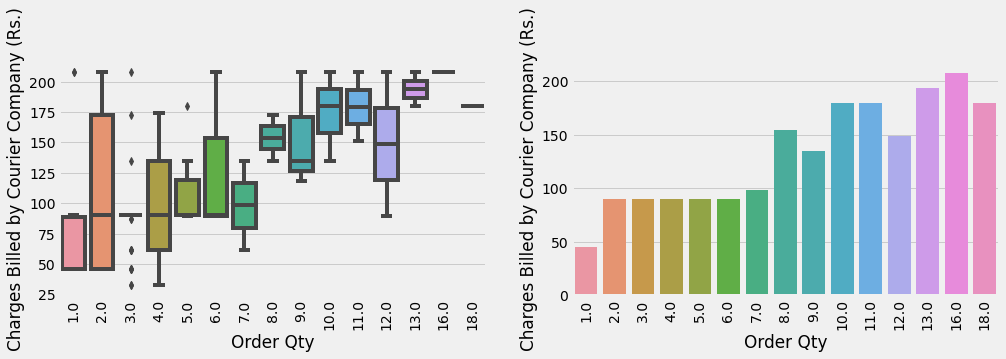

Order Qty Vs Difference Between Expected Charges and Billed Charges (Rs.)


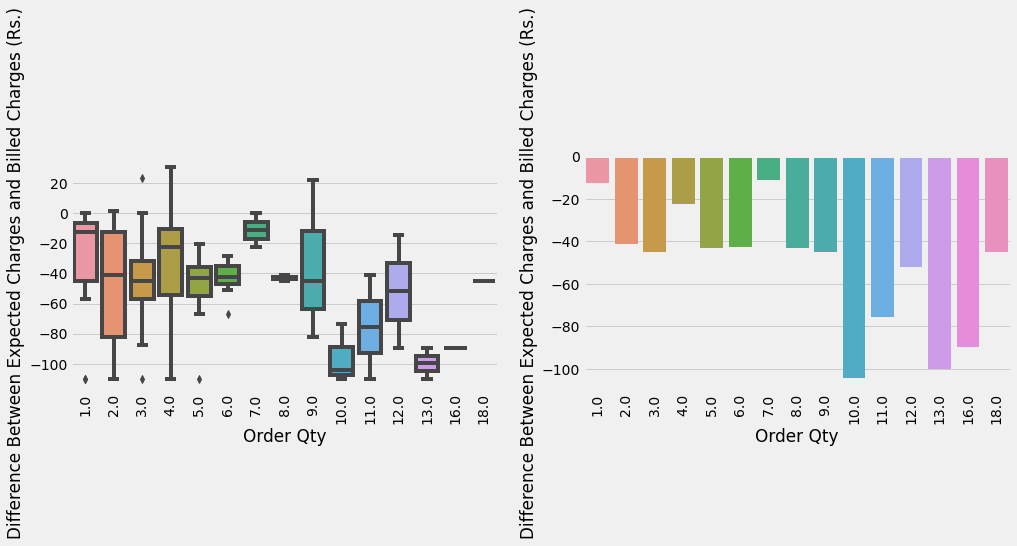

Type of Shipment Vs Total weight as per X (KG)


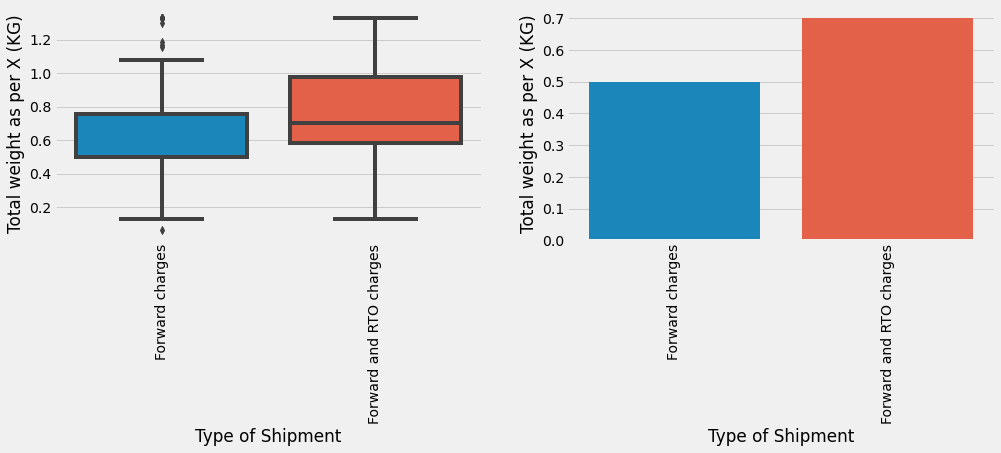

Type of Shipment Vs Total weight as per Courier Company (KG)


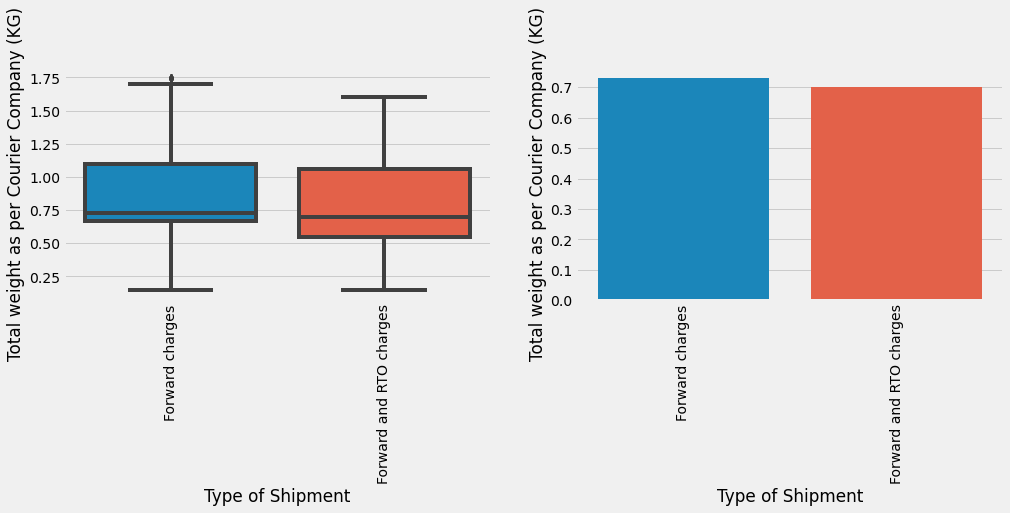

Type of Shipment Vs Expected Charge as per X (Rs.)


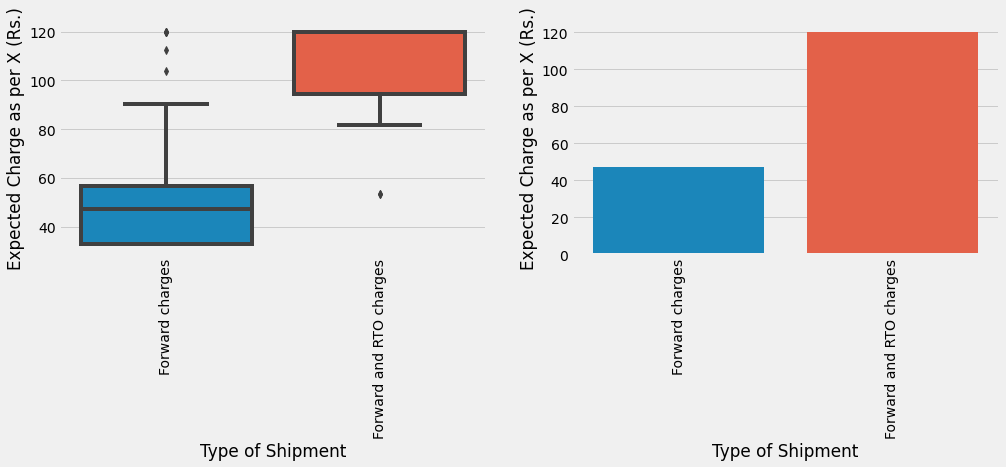

Type of Shipment Vs Charges Billed by Courier Company (Rs.)


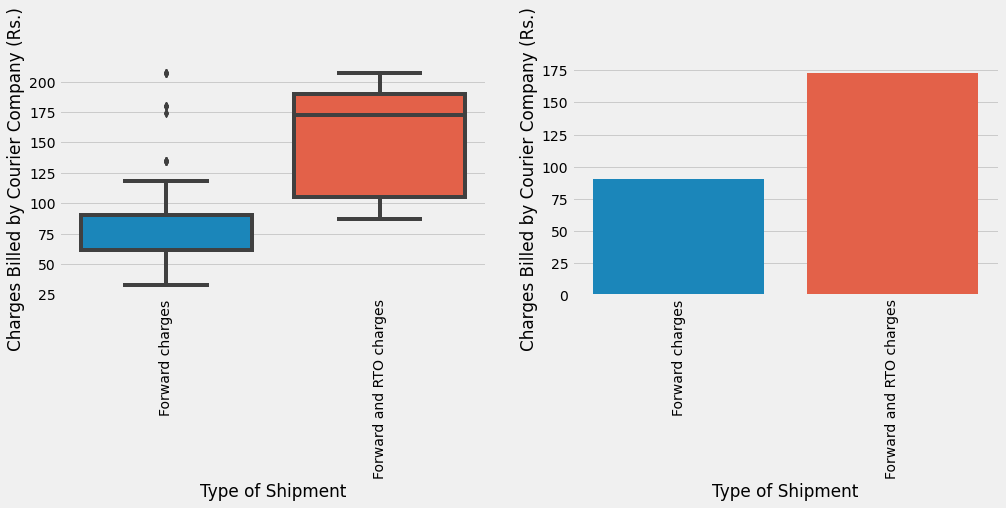

Type of Shipment Vs Difference Between Expected Charges and Billed Charges (Rs.)


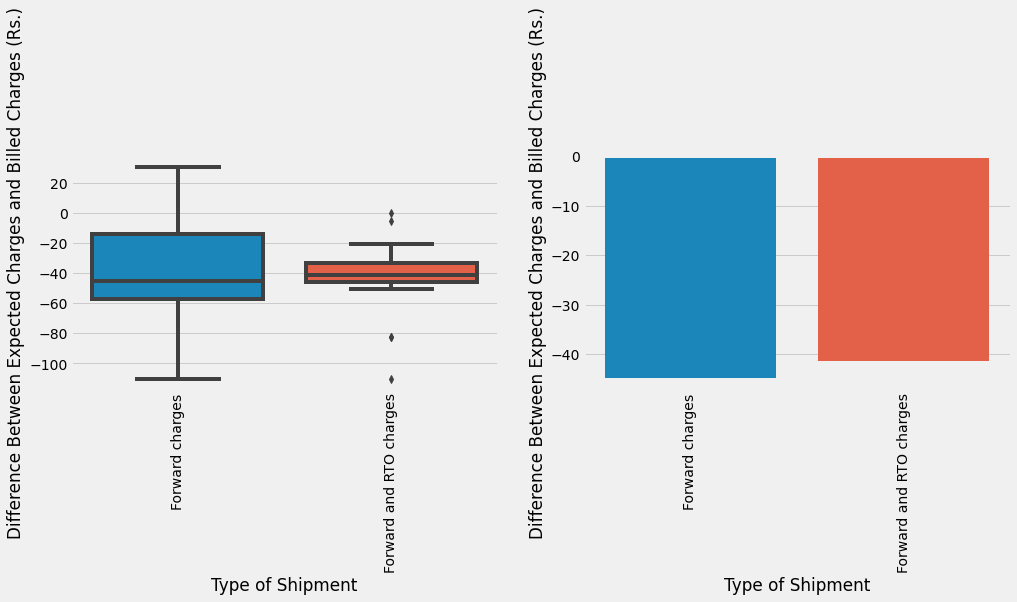

Weight slab as per X (KG) Vs Total weight as per X (KG)


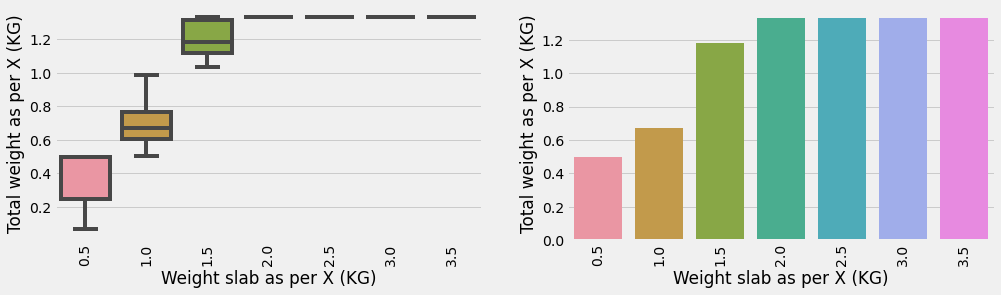

Weight slab as per X (KG) Vs Total weight as per Courier Company (KG)


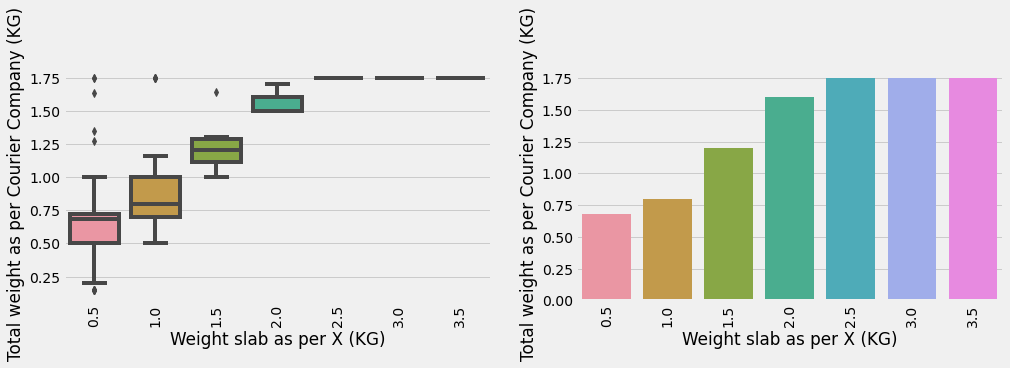

Weight slab as per X (KG) Vs Expected Charge as per X (Rs.)


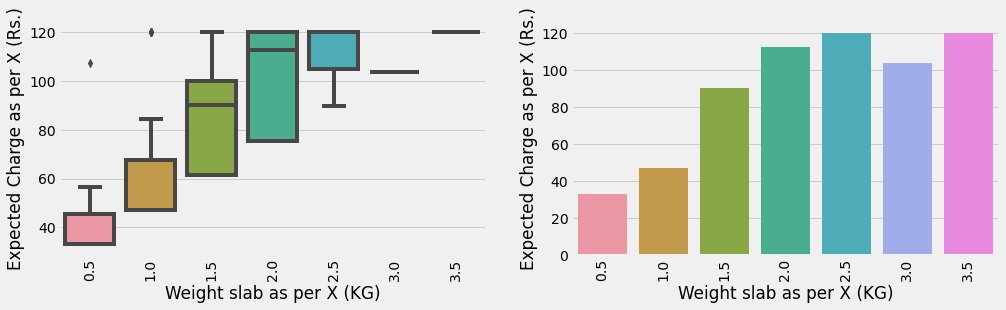

Weight slab as per X (KG) Vs Charges Billed by Courier Company (Rs.)


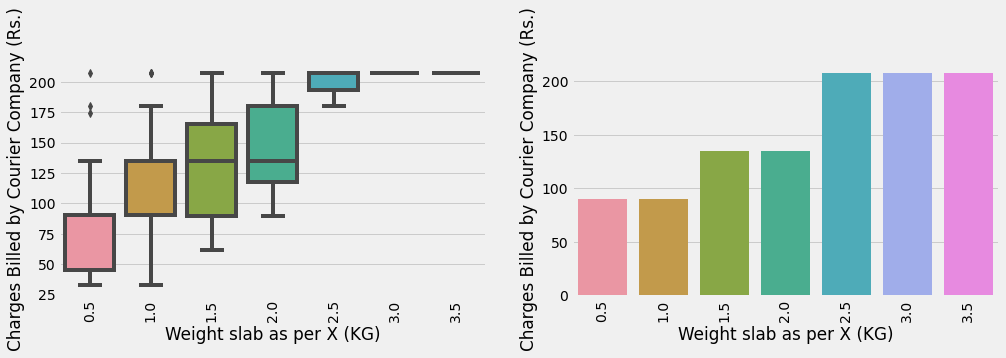

Weight slab as per X (KG) Vs Difference Between Expected Charges and Billed Charges (Rs.)


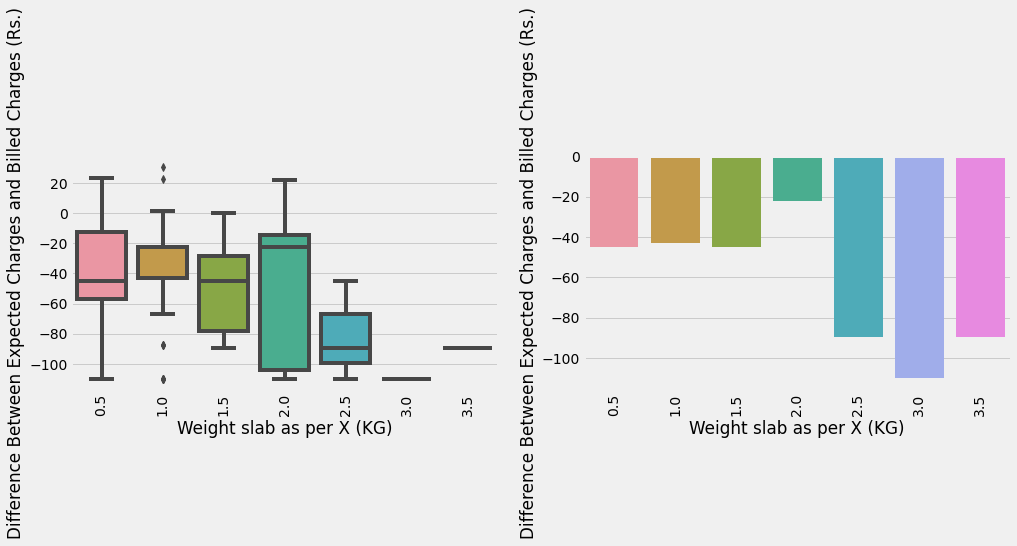

Weight slab charged by Courier Company (KG) Vs Total weight as per X (KG)


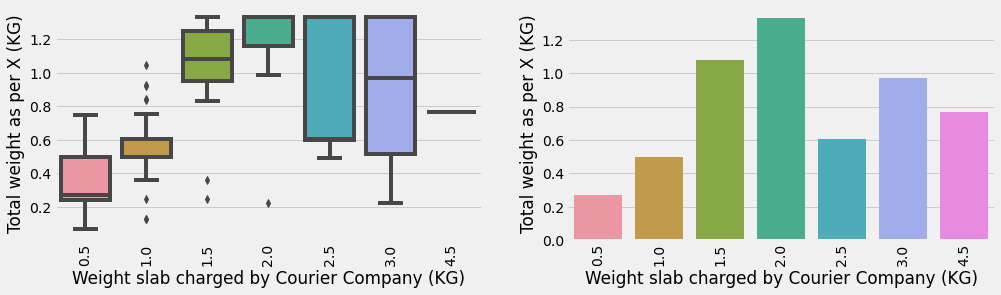

Weight slab charged by Courier Company (KG) Vs Total weight as per Courier Company (KG)


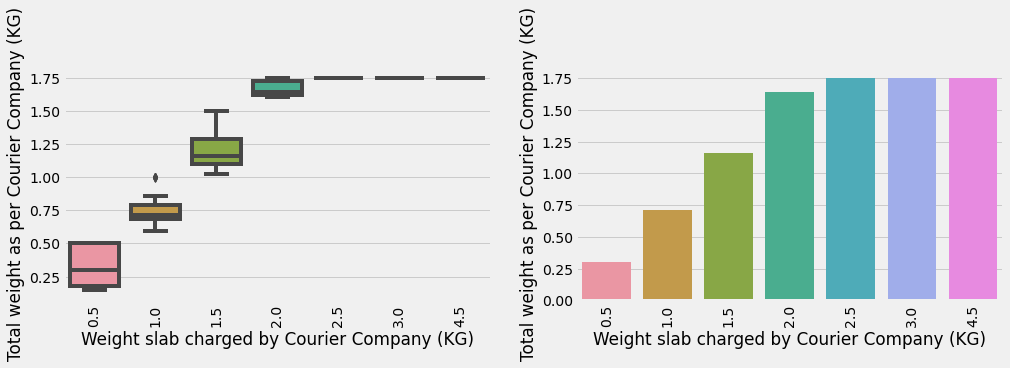

Weight slab charged by Courier Company (KG) Vs Expected Charge as per X (Rs.)


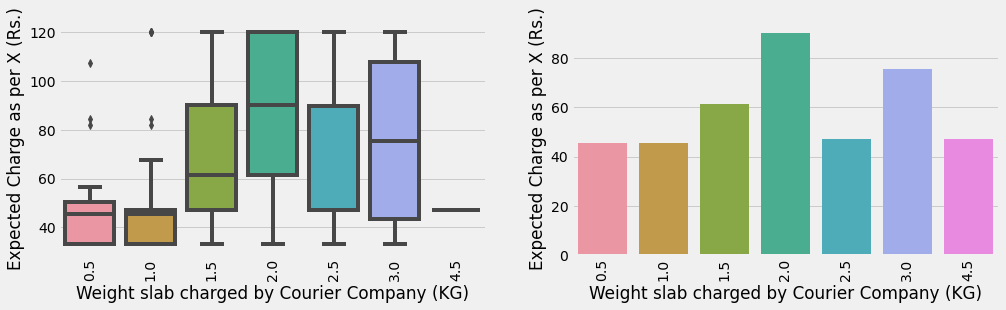

Weight slab charged by Courier Company (KG) Vs Charges Billed by Courier Company (Rs.)


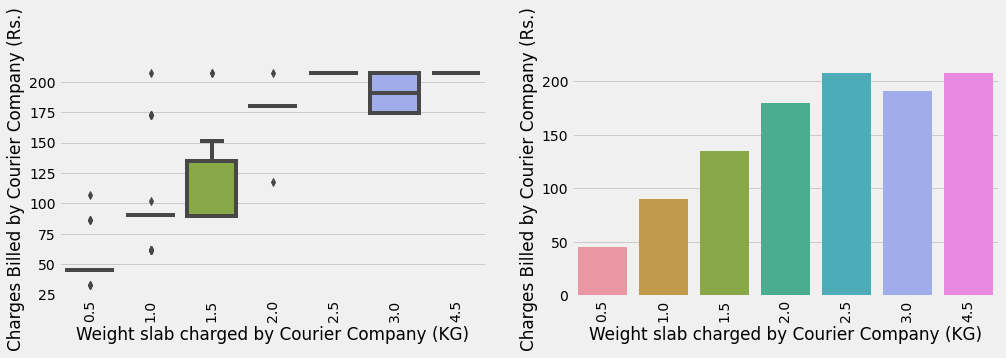

Weight slab charged by Courier Company (KG) Vs Difference Between Expected Charges and Billed Charges (Rs.)


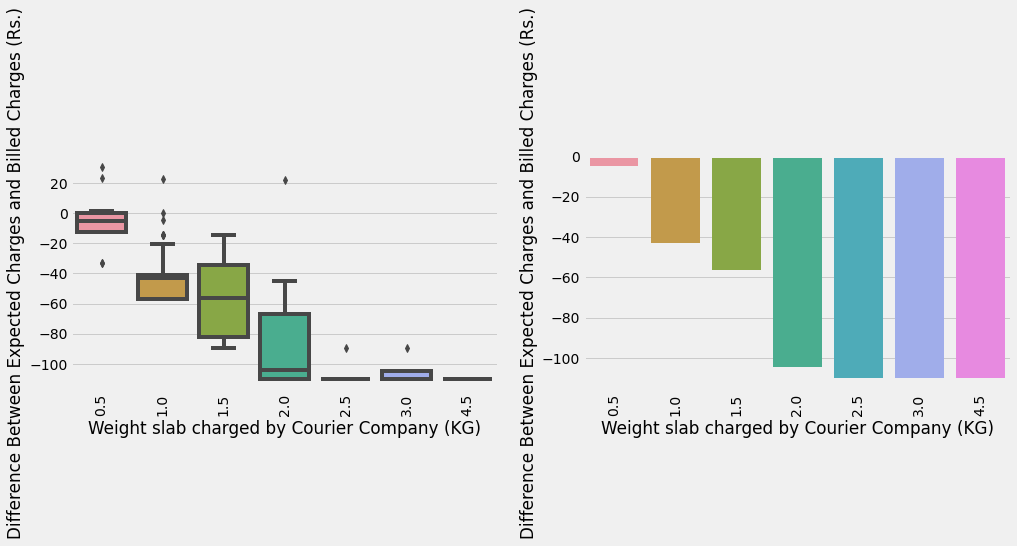

Delivery Zone as per X Vs Total weight as per X (KG)


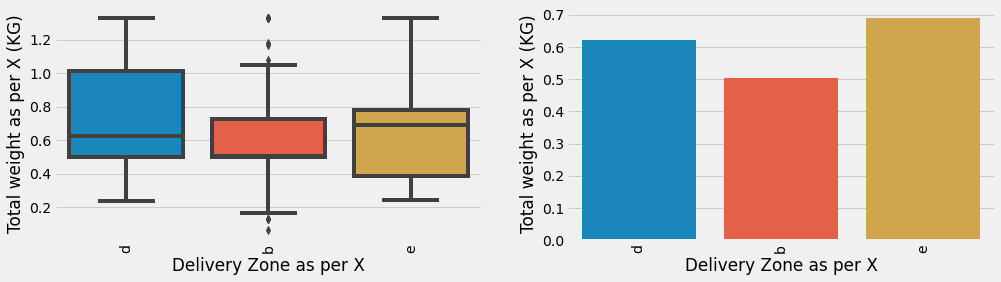

Delivery Zone as per X Vs Total weight as per Courier Company (KG)


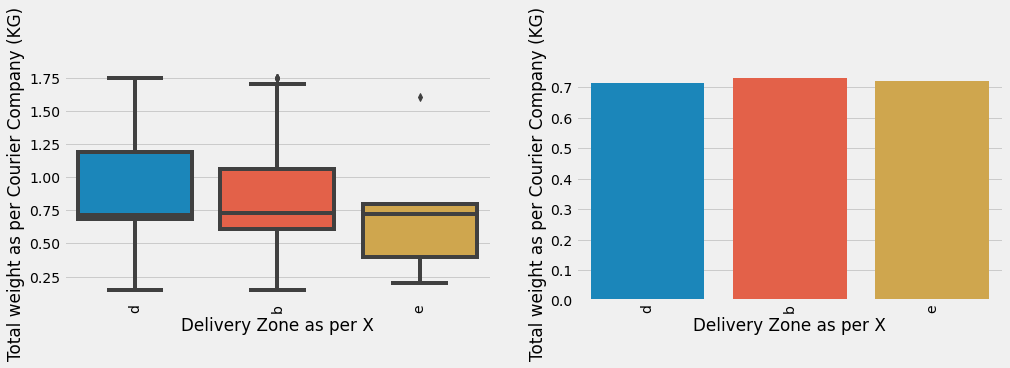

Delivery Zone as per X Vs Expected Charge as per X (Rs.)


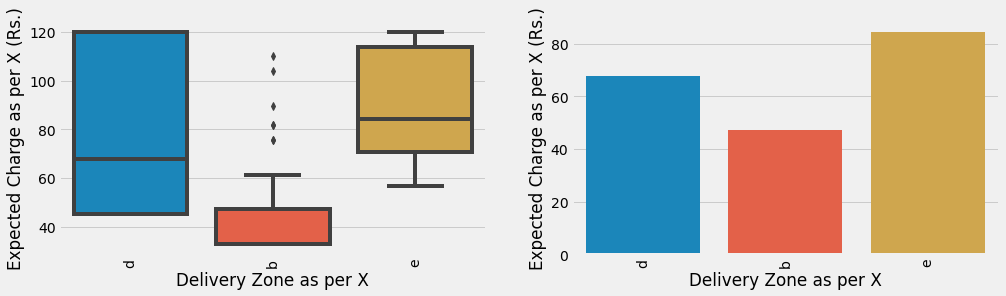

Delivery Zone as per X Vs Charges Billed by Courier Company (Rs.)


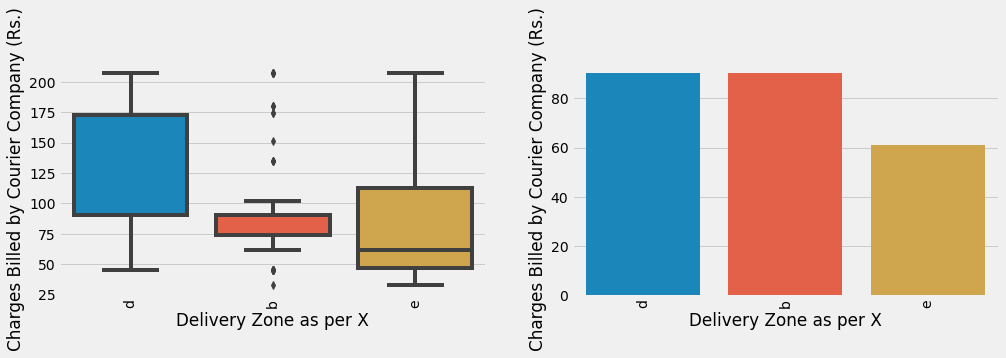

Delivery Zone as per X Vs Difference Between Expected Charges and Billed Charges (Rs.)


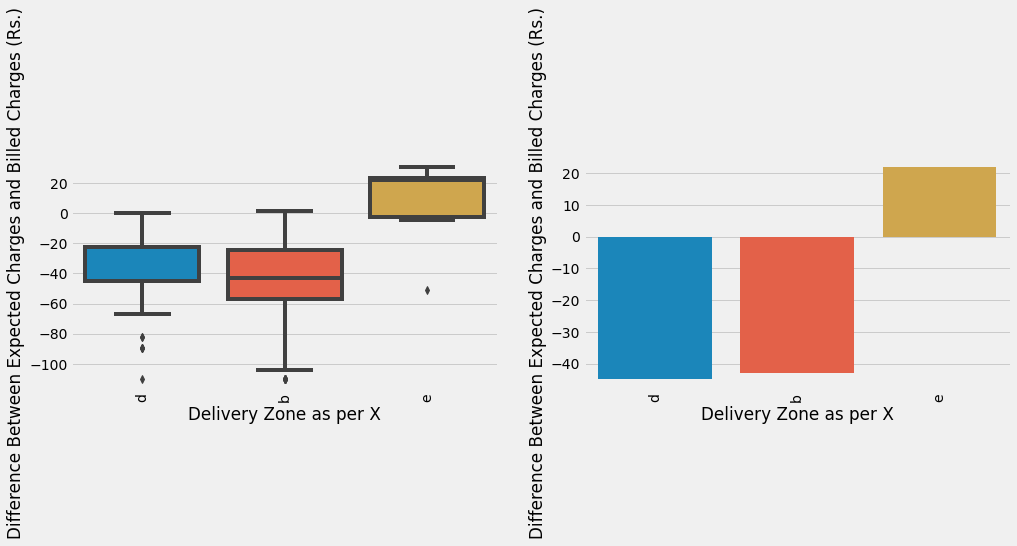

Delivery Zone charged by Courier Company Vs Total weight as per X (KG)


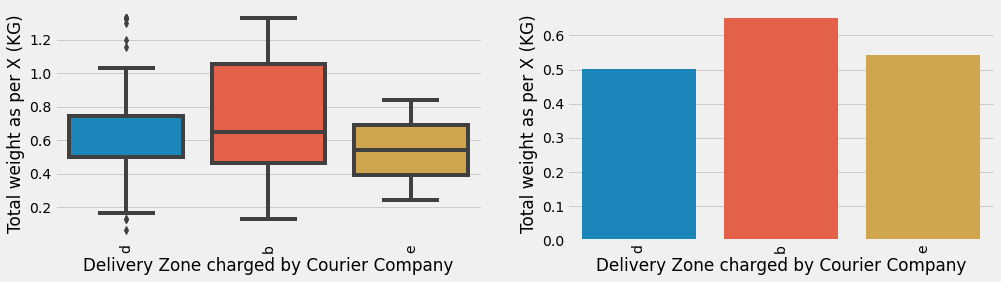

Delivery Zone charged by Courier Company Vs Total weight as per Courier Company (KG)


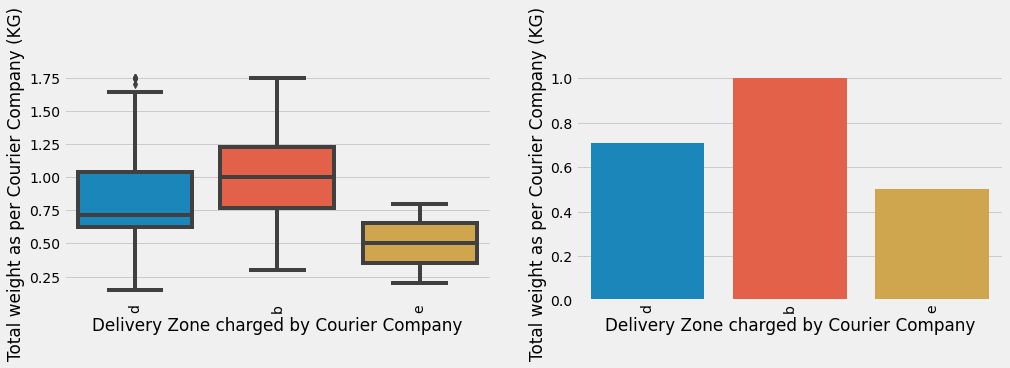

Delivery Zone charged by Courier Company Vs Expected Charge as per X (Rs.)


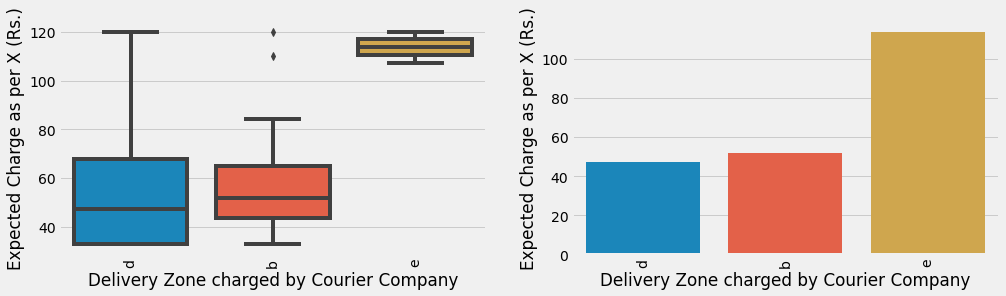

Delivery Zone charged by Courier Company Vs Charges Billed by Courier Company (Rs.)


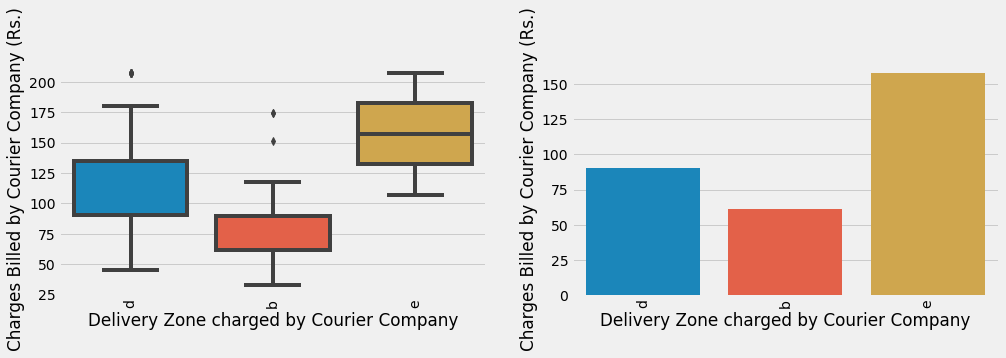

Delivery Zone charged by Courier Company Vs Difference Between Expected Charges and Billed Charges (Rs.)


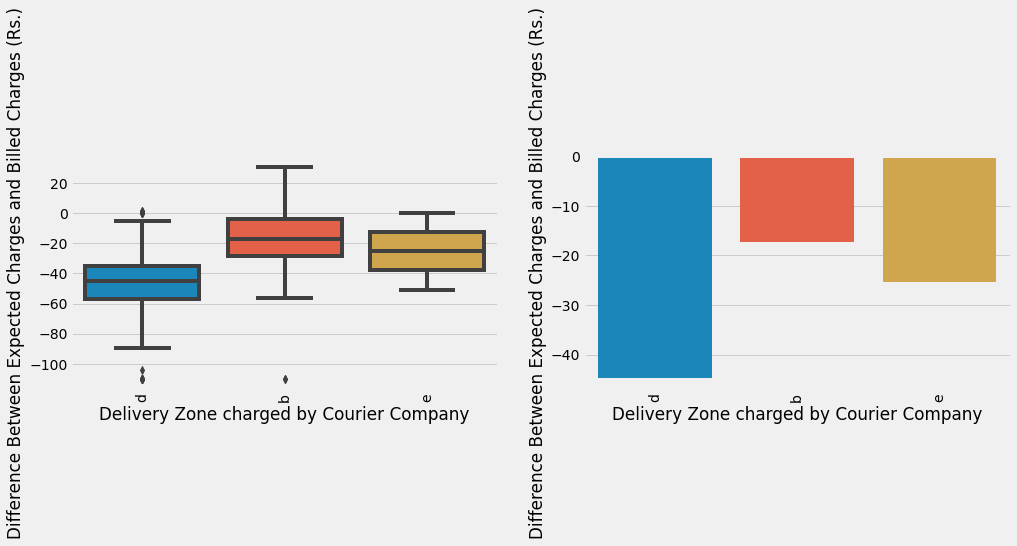

In [56]:
for i in categorical: # Automating categorical- continuous plot
    for j in continuous:
        
        print(i,"Vs",j)
        plt.figure(figsize=[15,4])
        
        plt.subplot(121)
        sns.boxplot(pivot_Company_X[i] , pivot_Company_X[j])# Plot 1
        plt.xticks(rotation=90)
        
        plt.subplot(122)
        sns.barplot(pivot_Company_X[i] , pivot_Company_X[j],ci=None,estimator=np.median)# plot 2
        plt.xticks(rotation=90)
        
        plt.show()

#### Conclusion
- The mean of Total weight as per X (KG) for "Forward shippment" is 0.5 kg while the mean of Total weight as per Courier Company (KG) for "Forward  shippment" is around 0.7 kg.
- Again the expected charge leived by the Courier company in both type of shippements are more than as expected by the Company X.
- The average weight leived by the courier company on every weight slab is more than the real weight.
- The average weight claimed by Courier Company in various zone are higher than as claimed by the COmpany X.

### Continuous- COntinuous Variable

In [57]:
pivot_Company_X.columns

Index(['Order ID', 'AWB Number', 'Order Qty', 'Type of Shipment',
       'Total weight as per X (KG)', 'Weight slab as per X (KG)',
       'Total weight as per Courier Company (KG)',
       'Weight slab charged by Courier Company (KG)', 'Delivery Zone as per X',
       'Delivery Zone charged by Courier Company',
       'Expected Charge as per X (Rs.)',
       'Charges Billed by Courier Company (Rs.)',
       'Difference Between Expected Charges and Billed Charges (Rs.)'],
      dtype='object')

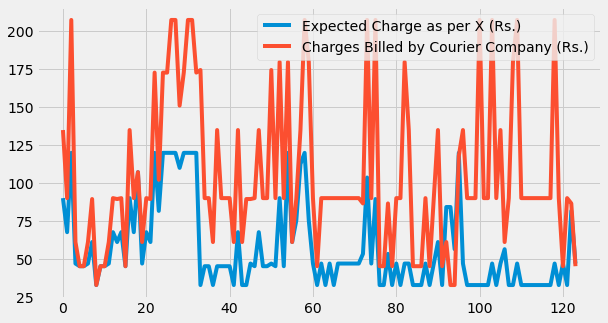

In [58]:
plt.figure(figsize=[9,5])
pivot_Company_X["Expected Charge as per X (Rs.)"].plot()
pivot_Company_X["Charges Billed by Courier Company (Rs.)"].plot()
plt.legend()

In [59]:
pivot_Company_X["Expected Charge as per X (Rs.)"].min()

33.0

## Multivariate Analysis

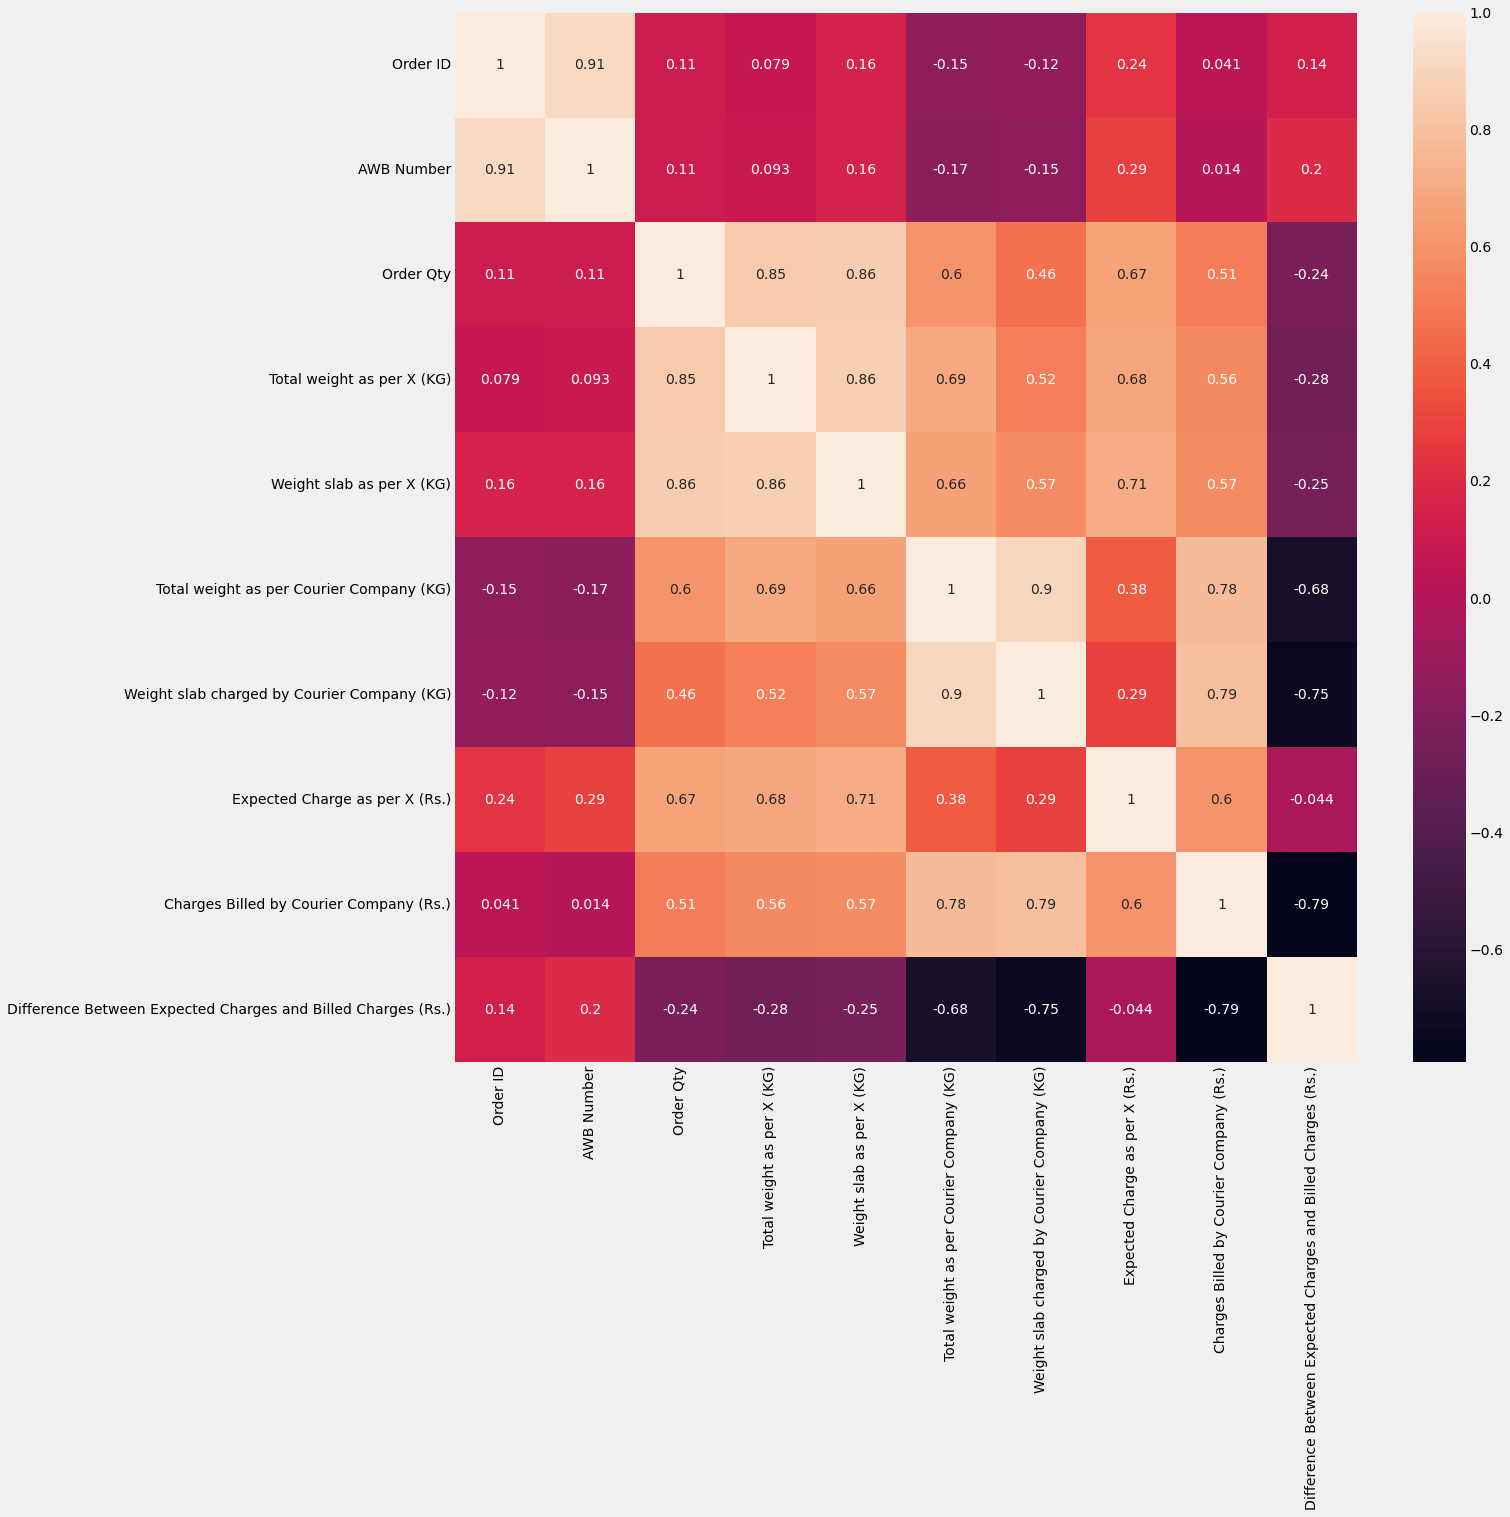

In [60]:
plt.figure(figsize=[18,18])
sns.heatmap(pivot_Company_X.corr(),annot = True)
plt.show()

### Let's check the actual variations in weights

In [61]:
print("Total weight as per X (KG) ",pivot_Company_X["Total weight as per X (KG)"].sum())
print("Total Weight (slab) as per X (KG) ",pivot_Company_X["Weight slab as per X (KG)"].sum())
print("Total Weight (slab) charged by Courier Company (KG) ",pivot_Company_X["Weight slab charged by Courier Company (KG)"].sum())

Total weight as per X (KG)  81.18325
Total Weight (slab) as per X (KG)  114.5
Total Weight (slab) charged by Courier Company (KG)  148.0


#### Conclusion
- It is clearly visible that the weight slab charrged by the courier is more than the company.

# Summary after outlier treatment

In [62]:
pivot_Company_X.drop(["Order Qty","Type of Shipment"] , axis = 1 , inplace = True)
pivot_Company_X.head()

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,1.30200,1.5,1.30000,1.5,d,d,90.20,135.00,-44.80
1,2001806273,1091117222194,0.61500,1.0,1.00000,1.0,d,d,67.80,90.20,-22.40
2,2001806408,1091117222931,1.33125,2.5,1.74875,2.5,d,d,120.00,207.45,-89.60
3,2001806458,1091117223244,0.70000,1.0,1.00000,1.0,b,b,47.15,61.30,-14.15
4,2001807012,1091117229345,0.24000,0.5,0.15000,0.5,d,d,45.40,45.40,0.00


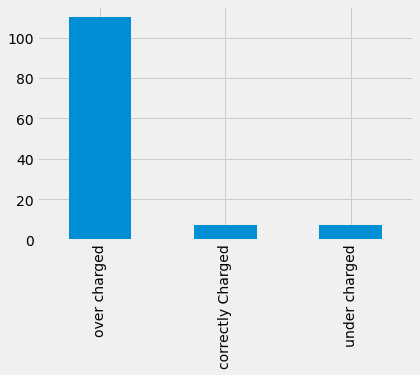

In [63]:
charge = pivot_Company_X["Difference Between Expected Charges and Billed Charges (Rs.)"].to_frame()
# Creating a column with the tag of charge type

def bucket_charge(x):
    if x["Difference Between Expected Charges and Billed Charges (Rs.)"]== 0:
        return "correctly Charged"
    elif x["Difference Between Expected Charges and Billed Charges (Rs.)"]< 0:
        return "over charged"
    else:
        return "under charged"
    
charge["charge_bucket"] = charge.apply(bucket_charge , axis = 1)
charge.charge_bucket.value_counts().plot.bar()
plt.show()

In [64]:
charge.rename(columns= {"Difference Between Expected Charges and Billed Charges (Rs.)": "Amount"},inplace = True)
summary1 = charge.groupby("charge_bucket").agg({"Amount" : ["count","sum"]})
summary1.rename(columns = {"count":"Count","sum":"Amount(Rs.)"},
                index={"correctly Charged":"Total orders where X has been correctly charged",
                      "over charged":"Total Orders where X has been overcharged",
                      "under charged":"Total Orders where X has been undercharged"} , inplace =  True)

## Conclusion 
- The charges levied by their partners per Order are not correct and seems to be fishy.